<a href="https://colab.research.google.com/github/charlesrugg/nfldata/blob/main/NFL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an NFL Game Score Prediciton Model

- [ ] Incoporate NFL Schedule DataFrame
- [ ] Perform a statistacal analysis on the Schedule DF
- [ ] Build Prediction Model off of schedule DF for Home and Opposing Scores
- [ ] Incorporate other DF's into the schedule DF (NGS, Injuries, roster info, etc) 
- [ ] Continue to perform statistcal analysis on column info as added. 
- [ ] Build into prediction model

In [3]:
pip install nfl-data-py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00
  Created wheel for nfl-data-py: filename=nfl_data_py-0.3.0-py3-none-any.whl size=25103 sha256=301e9724c3aa6bdad9687fc9a91f906184e3ae7c705a35eca4f76e47b4e908b9
  Stored in directory: /root/.cache/pip/wheels/0d/dd/64/ac11acfab32b58680881c80ff67db2ca9509f830e4782ecc07
Successfully built nfl-data-py
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [2]:
pip install -q seaborn

In [18]:
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)



2.11.0


2.11.0


In [19]:
schedule = nfl.import_schedules([2021,2022])
years = range(1999, 2023)  # range of years to import
schedules = []  # list to store imported schedules

for year in years:
    schedule = nfl.import_schedules([year])
    schedules.append(schedule)

# Concatenate all schedules into a single dataframe
schedules_df = pd.concat(schedules)

In [6]:
schedule.columns

Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')

In [11]:
schedule.style.format("{:.2f}")
pd.set_option('display.max_columns', None)
schedule.iloc[:1]
schedule.iloc[:-1]

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,gsis,nfl_detail_id,pfr,pff,espn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
6137,2022_01_BUF_LA,2022,REG,1,2022-09-08,Thursday,20:20,BUF,31,LA,10,Home,-21,41,0,2022090800,NaN,NaN,202209080ram,NaN,401437654,7,7,-117.0,106.0,-1.0,-112.0,101.0,51.5,-101.0,-111.0,0,dome,matrixturf,NaN,NaN,00-0034857,00-0026498,Josh Allen,Matthew Stafford,Sean McDermott,Sean McVay,Carl Cheffers,LAX01,SoFi Stadium
6138,2022_01_NO_ATL,2022,REG,1,2022-09-11,Sunday,13:00,NO,27,ATL,26,Home,-1,53,0,2022091100,NaN,NaN,202209110atl,NaN,401437650,7,7,-228.0,201.0,-6.0,-103.0,-107.0,43.5,-104.0,-108.0,1,closed,fieldturf,NaN,NaN,00-0031503,00-0032268,Jameis Winston,Marcus Mariota,Dennis Allen,Arthur Smith,Alex Kemp,ATL97,Mercedes-Benz Stadium
6139,2022_01_CLE_CAR,2022,REG,1,2022-09-11,Sunday,13:00,CLE,26,CAR,24,Home,-2,50,0,2022091101,NaN,NaN,202209110car,NaN,401437651,7,7,114.0,-125.0,2.5,-112.0,102.0,42.5,-113.0,100.0,0,outdoors,grass,NaN,NaN,00-0033119,00-0034855,Jacoby Brissett,Baker Mayfield,Kevin Stefanski,Matt Rhule,Brad Rogers,CAR00,Bank of America Stadium
6140,2022_01_SF_CHI,2022,REG,1,2022-09-11,Sunday,13:00,SF,10,CHI,19,Home,9,29,0,2022091102,NaN,NaN,202209110chi,NaN,401437647,7,7,-248.0,217.0,-6.5,100.0,-111.0,38.0,-103.0,-109.0,0,outdoors,grass,NaN,NaN,00-0037012,00-0036945,Trey Lance,Justin Fields,Kyle Shanahan,Matt Eberflus,Clay Martin,CHI98,Soldier Field
6141,2022_01_PIT_CIN,2022,REG,1,2022-09-11,Sunday,13:00,PIT,23,CIN,20,Home,-3,43,1,2022091103,NaN,NaN,202209110cin,NaN,401437634,7,7,264.0,-308.0,7.5,-119.0,107.0,44.5,101.0,-113.0,1,outdoors,fieldturf,NaN,NaN,00-0033869,00-0036442,Mitch Trubisky,Joe Burrow,Mike Tomlin,Zac Taylor,Shawn Hochuli,CIN00,Paycor Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,2022_20_NYG_PHI,2022,DIV,20,2023-01-21,Saturday,20:15,NYG,7,PHI,38,Home,31,45,0,2023012101,NaN,NaN,202301210phi,NaN,401438004,6,13,304.0,-360.0,8.0,101.0,-111.0,48.0,-113.0,101.0,1,outdoors,grass,40.0,6.0,00-0035710,00-0036389,Daniel Jones,Jalen Hurts,Brian Daboll,Nick Sirianni,Clete Blakeman,PHI00,Lincoln Financial Field
6416,2022_20_CIN_BUF,2022,DIV,20,2023-01-22,Sunday,15:00,CIN,27,BUF,10,Home,-17,37,0,2023012200,NaN,NaN,202301220buf,NaN,401438007,7,7,226.0,-259.0,6.0,-107.0,-103.0,48.5,-107.0,-105.0,0,outdoors,a_turf,32.0,4.0,00-0036442,00-0034857,Joe Burrow,Josh Allen,Zac Taylor,Sean McDermott,Carl Cheffers,BUF00,New Era Field
6417,2022_20_DAL_SF,2022,DIV,20,2023-01-22,Sunday,18:30,DAL,12,SF,19,Home,7,31,0,2023012201,NaN,NaN,202301220sfo,NaN,401438006,6,8,164.0,-183.0,3.5,-107.0,-103.0,46.5,-105.0,-107.0,0,outdoors,grass,55.0,19.0,00-0033077,00-0037834,Dak Prescott,Brock Purdy,Mike McCarthy,Kyle Shanahan,Bill Vinovich,SFO01,Levi's Stadium
6418,2022_21_SF_PHI,2022,CON,21,2023-01-29,Sunday,15:00,SF,7,PHI,31,Home,24,38,0,2023012900,NaN,NaN,202301290phi,NaN,401438009,7,8,133.0,-147.0,2.5,105.0,-116.0,45.0,-114.0,101.0,0,outdoors,grass,52.0,14.0,00-0037834,00-0036389,Brock Purdy,Jalen Hurts,Kyle Shanahan,Nick Sirianni,John Hussey,PHI00,Lincoln Financial Field


In [20]:
schedules_df.style.format("{:.2f}")
pd.set_option('display.max_columns', None)
schedules_df.iloc[:1]
schedules_df.iloc[:-1]

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,gsis,nfl_detail_id,pfr,pff,espn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17,ATL,14,Home,-3,31,0,1999091210,598.0,NaN,199909120atl,NaN,190912001,7,7,NaN,NaN,-4.0,NaN,NaN,49.0,NaN,NaN,0,dome,astroturf,NaN,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17,CHI,20,Home,3,37,0,1999091206,597.0,NaN,199909120chi,NaN,190912003,7,7,NaN,NaN,-3.0,NaN,NaN,38.0,NaN,NaN,0,outdoors,grass,80.0,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43,CLE,0,Home,-43,43,0,1999091213,604.0,NaN,199909120cle,NaN,190912005,7,7,NaN,NaN,-6.0,NaN,NaN,37.0,NaN,NaN,1,outdoors,grass,78.0,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24,GB,28,Home,4,52,0,1999091208,602.0,NaN,199909120gnb,NaN,190912009,7,7,NaN,NaN,9.0,NaN,NaN,43.0,NaN,NaN,0,outdoors,grass,67.0,10.0,00-0005741,00-0005106,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14,IND,31,Home,17,45,0,1999091202,591.0,NaN,199909120clt,NaN,190912011,7,7,NaN,NaN,-3.0,NaN,NaN,45.5,NaN,NaN,1,dome,astroturf,NaN,NaN,00-0005363,00-0010346,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99,RCA Dome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,2022_20_NYG_PHI,2022,DIV,20,2023-01-21,Saturday,20:15,NYG,7,PHI,38,Home,31,45,0,2023012101,NaN,NaN,202301210phi,NaN,401438004,6,13,304.0,-360.0,8.0,101.0,-111.0,48.0,-113.0,101.0,1,outdoors,grass,40.0,6.0,00-0035710,00-0036389,Daniel Jones,Jalen Hurts,Brian Daboll,Nick Sirianni,Clete Blakeman,PHI00,Lincoln Financial Field
6416,2022_20_CIN_BUF,2022,DIV,20,2023-01-22,Sunday,15:00,CIN,27,BUF,10,Home,-17,37,0,2023012200,NaN,NaN,202301220buf,NaN,401438007,7,7,226.0,-259.0,6.0,-107.0,-103.0,48.5,-107.0,-105.0,0,outdoors,a_turf,32.0,4.0,00-0036442,00-0034857,Joe Burrow,Josh Allen,Zac Taylor,Sean McDermott,Carl Cheffers,BUF00,New Era Field
6417,2022_20_DAL_SF,2022,DIV,20,2023-01-22,Sunday,18:30,DAL,12,SF,19,Home,7,31,0,2023012201,NaN,NaN,202301220sfo,NaN,401438006,6,8,164.0,-183.0,3.5,-107.0,-103.0,46.5,-105.0,-107.0,0,outdoors,grass,55.0,19.0,00-0033077,00-0037834,Dak Prescott,Brock Purdy,Mike McCarthy,Kyle Shanahan,Bill Vinovich,SFO01,Levi's Stadium
6418,2022_21_SF_PHI,2022,CON,21,2023-01-29,Sunday,15:00,SF,7,PHI,31,Home,24,38,0,2023012900,NaN,NaN,202301290phi,NaN,401438009,7,8,133.0,-147.0,2.5,105.0,-116.0,45.0,-114.0,101.0,0,outdoors,grass,52.0,14.0,00-0037834,00-0036389,Brock Purdy,Jalen Hurts,Kyle Shanahan,Nick Sirianni,John Hussey,PHI00,Lincoln Financial Field


In [25]:
reduced_schedule_df = schedules_df.loc[:,['game_type', 'week', 'gameday', 'weekday','gametime', 'away_team', 'away_score', 'home_team', 'home_score','location', 'result', 'total', 'away_rest', 'home_rest','away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
      'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game','roof', 'surface', 'temp', 'wind','away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee', 'stadium_id']]

In [26]:
schedules_df.style.format("{:.2f}")
pd.set_option('display.max_columns', None)
reduced_schedule_df.iloc[:-1]

,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id
0,REG,1,1999-09-12,Sunday,NaN,MIN,17,ATL,14,Home,-3,31,7,7,NaN,NaN,-4.0,NaN,NaN,49.0,NaN,NaN,0,dome,astroturf,NaN,NaN,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00
1,REG,1,1999-09-12,Sunday,NaN,KC,17,CHI,20,Home,3,37,7,7,NaN,NaN,-3.0,NaN,NaN,38.0,NaN,NaN,0,outdoors,grass,80.0,12.0,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98
2,REG,1,1999-09-12,Sunday,NaN,PIT,43,CLE,0,Home,-43,43,7,7,NaN,NaN,-6.0,NaN,NaN,37.0,NaN,NaN,1,outdoors,grass,78.0,12.0,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00
3,REG,1,1999-09-12,Sunday,NaN,OAK,24,GB,28,Home,4,52,7,7,NaN,NaN,9.0,NaN,NaN,43.0,NaN,NaN,0,outdoors,grass,67.0,10.0,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00
4,REG,1,1999-09-12,Sunday,NaN,BUF,14,IND,31,Home,17,45,7,7,NaN,NaN,-3.0,NaN,NaN,45.5,NaN,NaN,1,dome,astroturf,NaN,NaN,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,DIV,20,2023-01-21,Saturday,20:15,NYG,7,PHI,38,Home,31,45,6,13,304.0,-360.0,8.0,101.0,-111.0,48.0,-113.0,101.0,1,outdoors,grass,40.0,6.0,Daniel Jones,Jalen Hurts,Brian Daboll,Nick Sirianni,Clete Blakeman,PHI00
6416,DIV,20,2023-01-22,Sunday,15:00,CIN,27,BUF,10,Home,-17,37,7,7,226.0,-259.0,6.0,-107.0,-103.0,48.5,-107.0,-105.0,0,outdoors,a_turf,32.0,4.0,Joe Burrow,Josh Allen,Zac Taylor,Sean McDermott,Carl Cheffers,BUF00
6417,DIV,20,2023-01-22,Sunday,18:30,DAL,12,SF,19,Home,7,31,6,8,164.0,-183.0,3.5,-107.0,-103.0,46.5,-105.0,-107.0,0,outdoors,grass,55.0,19.0,Dak Prescott,Brock Purdy,Mike McCarthy,Kyle Shanahan,Bill Vinovich,SFO01
6418,CON,21,2023-01-29,Sunday,15:00,SF,7,PHI,31,Home,24,38,7,8,133.0,-147.0,2.5,105.0,-116.0,45.0,-114.0,101.0,0,outdoors,grass,52.0,14.0,Brock Purdy,Jalen Hurts,Kyle Shanahan,Nick Sirianni,John Hussey,PHI00


In [29]:
url = "https://projects.fivethirtyeight.com/nfl-api/nfl_elo.csv"
elo_df = pd.read_csv(url)

In [30]:
elo_df.style.format("{:.2f}")
pd.set_option('display.max_columns', None)
elo_df.iloc[:-1] 

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1,qb2,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1920-09-26,1920,0,NaN,RII,STP,1503.947000,1300.000000,0.824651,0.175349,1516.108000,1287.838000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,1920-10-03,1920,0,NaN,AKR,WHE,1503.420000,1300.000000,0.824212,0.175788,1515.278000,1288.142000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,0,NaN,NaN,NaN
2,1920-10-03,1920,0,NaN,BFF,WBU,1478.004000,1300.000000,0.802000,0.198000,1489.757000,1288.247000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,6,NaN,NaN,NaN
3,1920-10-03,1920,0,NaN,DAY,COL,1493.002000,1504.908000,0.575819,0.424181,1515.434000,1482.475000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN
4,1920-10-03,1920,0,NaN,RII,MUN,1516.108000,1478.004000,0.644171,0.355829,1542.135000,1451.977000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2023-01-21,2022,0,d,PHI,NYG,1605.581893,1485.761956,0.743437,0.256563,1621.987292,1469.356557,1606.280740,1496.870894,Jalen Hurts,Daniel Jones,258.684806,210.534704,43.947079,38.557550,0.788399,0.211601,239.272897,-38.009000,256.743616,185.680334,1619.567823,1483.583812,38,7,87.0,100.0,94.0
17374,2023-01-22,2022,0,d,BUF,CIN,1731.516093,1690.292481,0.648277,0.351723,1692.139657,1729.668918,1714.417123,1651.306140,Josh Allen,Joe Burrow,228.662820,222.325953,-13.839064,17.070131,0.641191,0.358809,192.732702,303.726984,225.069808,230.466056,1675.570770,1690.152492,10,27,99.0,100.0,100.0
17375,2023-01-22,2022,0,d,SF,DAL,1708.971847,1640.135262,0.683613,0.316387,1721.375447,1627.731663,1702.555028,1636.245121,Brock Purdy,Dak Prescott,104.951787,201.524276,-53.296133,16.754303,0.589496,0.410504,146.767563,105.114287,109.133365,191.883277,1719.153115,1619.647034,19,12,98.0,100.0,99.0
17376,2023-01-29,2022,0,c,PHI,SF,1621.987292,1721.375447,0.450672,0.549328,1657.913193,1685.449546,1619.567823,1719.153115,Jalen Hurts,Brock Purdy,256.743616,109.133365,40.779129,-48.540538,0.586019,0.413981,157.574864,56.917741,246.826740,103.911803,1645.507079,1693.213858,31,7,99.0,100.0,100.0


In [ ]:
# Select only the numeric columns from the original dataframe
numeric_cols = schedule.select_dtypes(include='number').columns.tolist()

# Group by player_display_name and calculate the mean of each column
grouped = schedule.groupby('player_display_name')[numeric_cols].mean()

# Move the player_display_name index to column
grouped.reset_index(inplace=True)

In [ ]:
grouped.head

<bound method NDFrame.head of    player_display_name  season       week  avg_time_to_throw  \
0        Aaron Rodgers  2022.0   8.722222           2.701436   
1          Andy Dalton  2022.0  10.066667           2.627019   
2        Anthony Brown  2022.0  18.000000           2.686214   
3         Bailey Zappe  2022.0   5.500000           2.884749   
4       Baker Mayfield  2022.0   8.846154           2.841525   
..                 ...     ...        ...                ...   
62      Trevor Siemian  2022.0  12.000000           2.655680   
63          Trey Lance  2022.0   1.000000           2.942143   
64      Tua Tagovailoa  2022.0   8.461538           2.604778   
65       Tyler Huntley  2022.0  16.000000           2.865632   
66         Zach Wilson  2022.0   8.100000           3.087924   

    avg_completed_air_yards  avg_intended_air_yards  \
0                  5.128770                8.027893   
1                  5.964916                7.756637   
2                  7.628421         

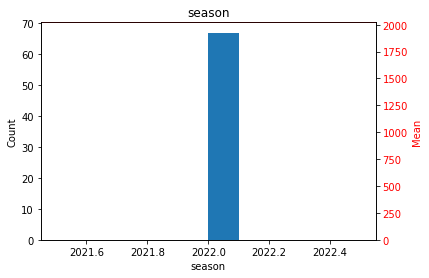

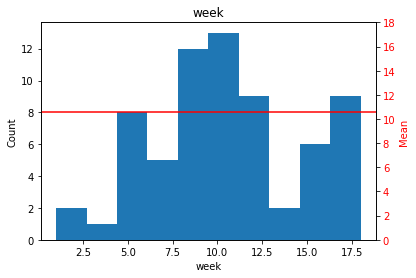

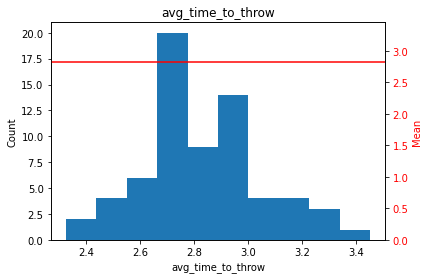

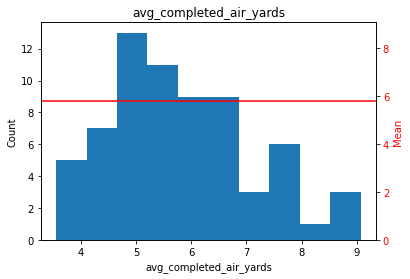

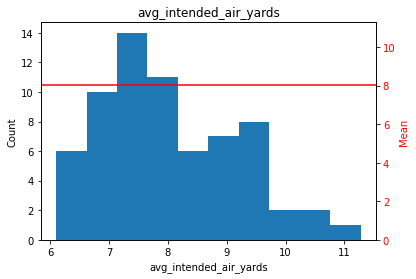

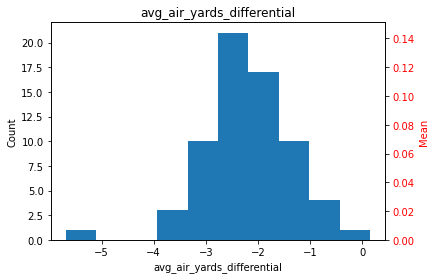

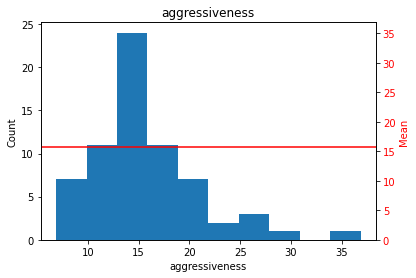

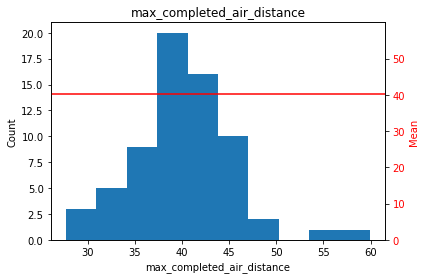

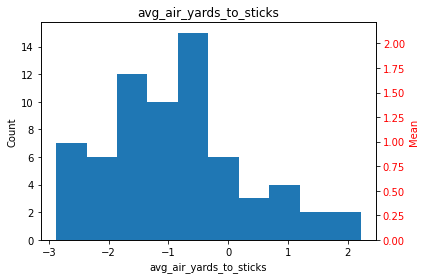

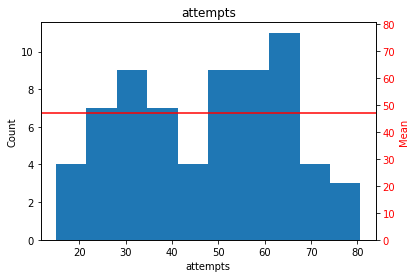

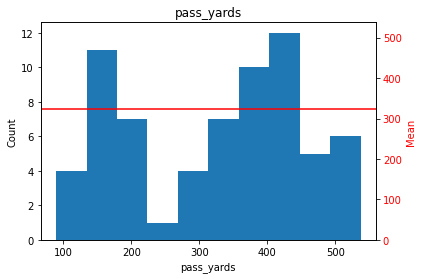

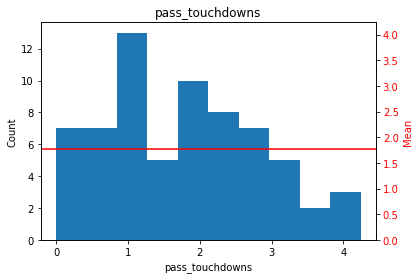

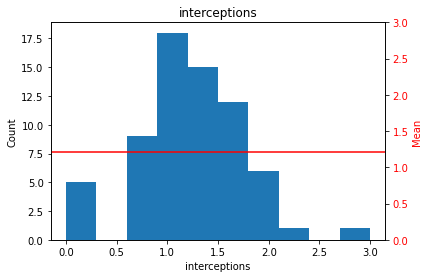

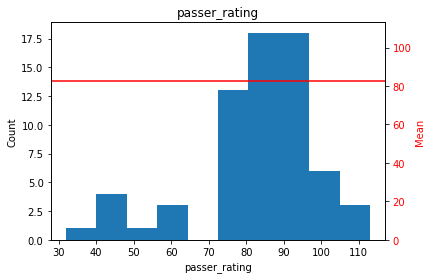

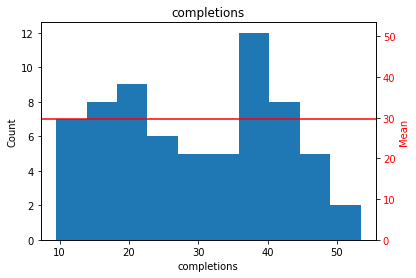

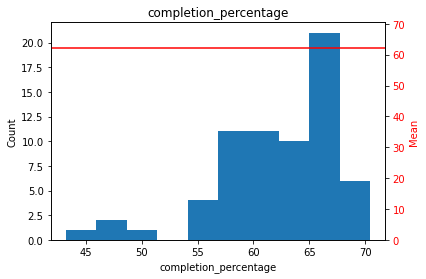

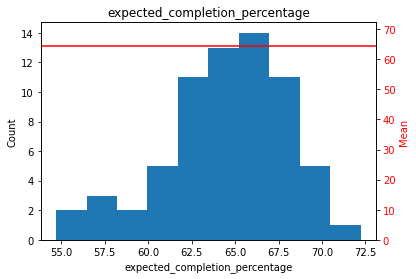

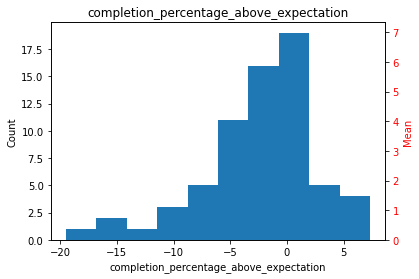

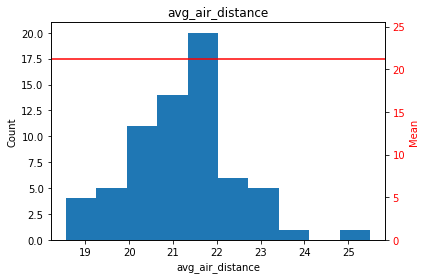

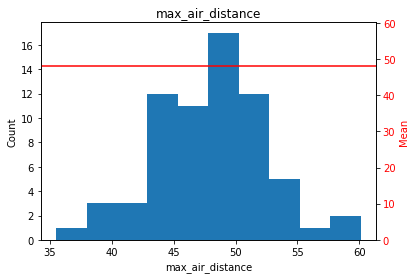

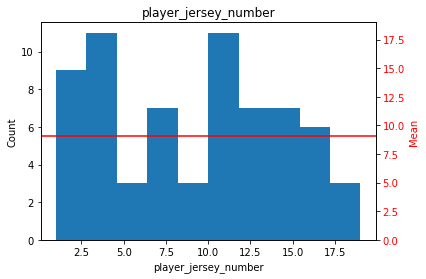

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram for each column
for col in grouped.columns:
    # Check if the column is not the player_display_name column
    if col != 'player_display_name':
        # Calculate the mean of the column
        avg = grouped[col].mean()

        # Create the histogram
        fig, ax1 = plt.subplots()
        ax1.hist(grouped[col])
        ax1.set_xlabel(col)
        ax1.set_ylabel("Count")

        # Add a second y-axis for the mean
        ax2 = ax1.twinx()
        ax2.axhline(y=avg, color='r', linestyle='-')
        ax2.set_ylabel("Mean", color='r')
        ax2.tick_params(axis='y', labelcolor='r')
        ax2.set_ylim([0, grouped[col].max()])

        # Display the plot
        plt.title(col)
        plt.show()

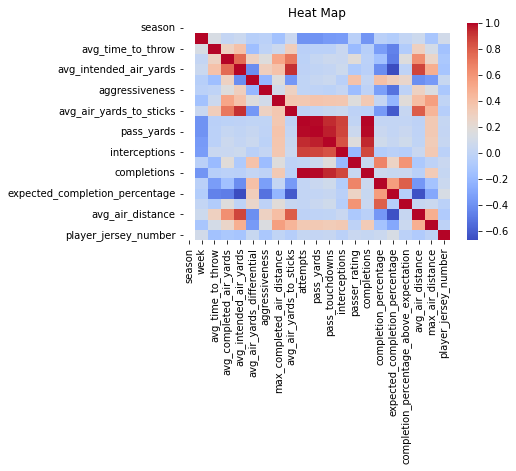

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Heat map
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
#sns.set(rc={'figure.figsize':(88,64)})
plt.title('Heat Map')
plt.show()